In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

In [2]:
cf.go_offline()
py.offline.init_notebook_mode(connected=True)

In [3]:
data_2015=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2015.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2015.head()

,Headlines
Date,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
2015-01-02,What to expect from Apple in 2015 beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [4]:
data_2015.shape

(365, 1)

In [5]:
data_2015.isnull().sum()

Headlines    0
dtype: int64

In [6]:
data_2015.dtypes

Headlines    object
dtype: object

In [7]:
data_2016=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2016.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2016.head()

,Headlines
Date,
2016-01-01,Investors Buy Apple Inc. (AAPL) on Weakness Be...
2016-01-02,AAPL Stock: Is This the Next Big Thing from Ap...
2016-01-03,Global Equities&quot; Trip Chowdhry Blasts App...
2016-01-04,Stifel Nicolaus Reiterates Buy Rating for Appl...
2016-01-05,Apple Sitting Out The Rally Apple&quot;s (AAPL...


In [8]:
data_2016.shape

(366, 1)

In [9]:
data_2016.isnull().sum()

Headlines    0
dtype: int64

In [10]:
data_2016.dtypes

Headlines    object
dtype: object

In [11]:
data_2017=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2017.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2017.head()

,Headlines
Date,
2017-01-01,Glyphosate: Unsafe On Any Plate - What Is In Y...
2017-01-02,The 2 Worst Artificial Intelligence Stocks of ...
2017-01-03,Internet Of Things - The Feds Are Inside Your ...
2017-01-04,Apple pulls New York Times app from iTunes sto...
2017-01-05,"Microsoft, Apple, Alphabet The Most Crowded La..."


In [12]:
data_2017.shape

(365, 1)

In [13]:
data_2017.isnull().sum()

Headlines    0
dtype: int64

In [14]:
data_2018=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2018.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2018.head()

,Headlines
Date,
2018-01-01,Apple&quot;s Executive Cash Bonus Plan Benzing...
2018-01-02,Sword Of Damocles: Unintended Consequences Of ...
2018-01-03,Intel Officially Responds to Inaccurate Media ...
2018-01-04,Jimmy Iovine to leave Apple Music in August - ...
2018-01-05,These Jaw-Dropping Facts Will Change Your Mind...


In [15]:
data_2018.shape

(365, 1)

In [16]:
data_2018.isnull().sum()

Headlines    0
dtype: int64

In [17]:
data_2019=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2019.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2019.head()

,Headlines
Date,
2019-01-01,Value Line: Now would be an opportune time to ...
2019-01-02,Australian shares gain as US futures point to ...
2019-01-03,"RPT-Paying the price: China shoppers, stung by..."
2019-01-04,The End Of The Age Of Apple? What Should I Do ...
2019-01-05,Why Apple Stock Dropped 12% in December Why Ap...


In [18]:
data_2019.shape

(364, 1)

In [19]:
data_2019.isnull().sum()

Headlines    0
dtype: int64

In [20]:
data_2020=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2020.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2020.head()

,Headlines
Date,
2020-01-01,"Apple Sale Alert: AirPods Pro, iPad Pro, iPhon..."
2020-01-02,Apple: Valuation Stretched Like A Rubber Band ...
2020-01-03,Apple CEO Tim Cook made $11.6 million in the c...
2020-01-04,"Apple Sale Alert: AirPods Pro, iPad Pro, iPhon..."
2020-01-05,"Apple 2020: Coming 13-Inch MacBook Pro, MacBoo..."


In [21]:
data_2020.shape

(366, 1)

In [22]:
data_2020.isnull().sum()

Headlines    0
dtype: int64

In [23]:
data_2021=pd.read_csv("C:/Users/DELL/Technocolabs(DS Intern)/Headlines_2021.csv",index_col='Date',
                     date_parser=lambda dates:pd.datetime.strptime(dates,"%Y-%m-%d"))
data_2021.head()

,Headlines
Date,
2021-01-01,Tales of underage workers in Apple&quot;s supp...
2021-01-02,Why Apple &quot;iCar&quot; Won&quot;t Be Self-...
2021-01-03,The best after-Christmas deals you can get rig...
2021-01-04,How four of this year&quot;s Transformers help...
2021-01-05,The Apple Products That Could Be Released In 2...


In [24]:
data_2021.shape

(174, 1)

In [25]:
data_2021.isnull().sum()

Headlines    0
dtype: int64

In [26]:
final_df=pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019,data_2020,data_2021])
final_df.head()

,Headlines
Date,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
2015-01-02,What to expect from Apple in 2015 beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [27]:
final_df.shape

(2365, 1)

In [28]:
final_df.drop_duplicates(inplace=True)

In [29]:
final_df.shape

(2332, 1)

In [30]:
final_df['Headlines'].tolist()

['What Can We Expect From Apple Inc. In 2015? 1 Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc.&quot;s First Quarter Will Be Huge Samsung: New smart TVs in 2015 to run on Tizen OS',
 'What to expect from Apple in 2015 beyond its smartwatch Amazon&quot;s Latest Kindle Unlimited Program Irks Authors Apple Inc. (AAPL) Gets An Upward Revision From Angus Could Palm-Branded Phones Ever Make A Comeback? Here&quot;s another look at Apple&quot;s own iBeacon Stock Update (NYSE:IBM): IBM, Apple Partnership Will Bear Sweet Fruit for Both Stocks Can the &quot;Internet of Things&quot; Help Broadcom Dominate Qualcomm? Rare photos shed light on Steve Jobs, and a young Silicon Valley Apple&quot;s iPad shipments in 2014 could be 8% below 2013 RF Micro Devices, Inc. (RFMD) and TriQuint Semiconductor (TQNT) Merged Into QORVO INC (QRVO) Apple Study: Only 5% Of U.S. iPhone Users Want Apple Watch Why Apple Inc. (AAPL) Stock Took a Small Hit Going Into 2015 Apple Sued 

# Handling contraction words

In [31]:
contractors_eng={
"&quot;":'"',
"a'ight":"alright",
"ain't":"am not",
"amn't":"am not",
"arencha":"aren’t you / are not you",
"aren't":"are not",
"‘bout":"about",
"cannot":"can not",
"can't":"cannot",
"cap’n":"captain",
"'cause":"because",
"’cept":"except",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"dammit":"damn it",
"daren't":"dare not / dared not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"dunno":"do not know",
"d'ye":"do you / did you",
"e'en":"even",
"e'er":"ever",
"'em":"them",
"everybody's":"everybody is",
"everyone's":"everyone is",
"fo’c’sle":"forecastle",
"’gainst":"against",
"g'day":"good day",
"gimme":"give me",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had / he would",
"he'll":"he shall / he will",
"helluva":"hell of a",
"he's":"he has / he is",
"here's":"here is",
"how'd":"how did / how would",
"howdy":"how do you do",
"how'll":"how will",
"how're":"how are",
"how's":"how has / how is / how does",
"I'd":"I had / I would",
"I'd've":"I would have",
"I'll":"I shall / I will",
"I'm":"I am",
"Imma":"I am about to",
"I'm'o":"I am going to",
"innit":"is it not",
"Ion":"I do not",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"its":"it is",
"it's":"it has / it is",
"Iunno":"I don't know",
"kinda":"kind of",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"methinks":"I think",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"‘neath":"beneath",
"needn't":"need not",
"nal":"and all",
"ne'er":"never",
"o'clock":"of the clock",
"o'er":"over",
"ol'":"old",
"oughtn't":"ought not",
"‘round":"around",
"'s":"is, has, does, or us",
"shalln't":"shall not",
"shan't":"shall not",
"she'd":"she had / she would",
"she'll":"she shall / she will",
"she's":"she has / she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody has / somebody is",
"someone's":"someone has / someone is",
"something's":"something has / something is",
"so're":"so are",
"so’s":"so is / so has",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that has / that is",
"that'd":"that would / that had",
"there'd":"there had / there would",
"there'll":"there shall / there will",
"there're":"there are",
"there's":"there has / there is",
"these're":"these are",
"these've":"these have",
"they'd":"they had / they would",
"they'll":"they will",
"they're":"they are / they were",
"they've":"they have",
"this's":"this has / this is",
"those're":"those are",
"those've":"those have",
"'thout":"without",
"’til":"until",
"'tis":"it is",
"to've":"to have",
"'twas":"it was",
"'tween":"between",
"'twere":"it were",
"wanna":"want to",
"wasn't":"was not",
"we'd":"we had / we would/ we did",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"whatcha":"what are you",
"what'd":"what did",
"what'll":"what will",
"what're":"what are/what were",
"what's":"what has / what is / what does",
"what've":"what have",
"when's":"when has / when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where has / where is / where does",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which has / which is",
"which've":"which have",
"who'd":"who would / who had / who did",
"who'd've":"who would have",
"who'll":"who shall / who will",
"who're":"who are",
"who's":"who has / who is / who does",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why has / why is / why does",
"willn't":"will not",
"won't":"will not",
"wonnot":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'all":"you all",
"y'all'd've":"you all would have",
"y'all'd'n't've":"you all would not have",
"y'all're":"you all are",
"y'at":"you at",
"yes’m":"yes ma’am / yes madam",
"yessir":"yes sir",
"you'd":"you had / you would",
"you'll":"you shall / you will",
"you're":"you are",
"you've":"you have"
}

In [32]:
def contractions(x):
    if type(x) is str:
        x=x.replace("\\","")
        for key in contractors_eng:
            val=contractors_eng[key]
            x=x.replace(key,val)
        return x
    else:
        return x

In [33]:
%%time
final_df["Headlines"]=final_df["Headlines"].apply(lambda x: contractions(x))

Wall time: 1.65 s


# Changing all to lower case

In [34]:
col=['Headlines']
for index in col:
    final_df[index]=final_df[index].str.lower()
final_df.head()

,Headlines
Date,
2015-01-01,what can we expect from apple inc. in 2015? 1 ...
2015-01-02,what to expect from apple in 2015 beyond it is...
2015-01-03,mountie: an inexpensive and innovative way to ...
2015-01-04,"doand alld yacktman on the sources of moats, h..."
2015-01-05,"sim-free iphone 6, 6 plus reportedly debuting ..."


# Stopwords Removal

In [35]:
final_df['Headlines']=final_df['Headlines'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

# Lemmitization

In [36]:
lem=WordNetLemmatizer()
final_df['Headlines']=final_df['Headlines'].apply(lambda x:' '.join([lem.lemmatize(word) for word in x.split()]))

# Tokenization

In [37]:
ps = PorterStemmer()
corpus = []
for i in range(0,2332):
    news = final_df['Headlines'][i]
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(STOPWORDS)]
    news = ' '.join(news)
    corpus.append(news)

In [38]:
final_df.head()

,Headlines
Date,
2015-01-01,expect apple inc. 2015? 1 reason might wrong a...
2015-01-02,"expect apple 2015 beyond smartwatch amazon""s l..."
2015-01-03,mountie: inexpensive innovative way attach iph...
2015-01-04,"doand alld yacktman source moats, concern appl..."
2015-01-05,"sim-free iphone 6, 6 plus reportedly debuting ..."


# WordCloud

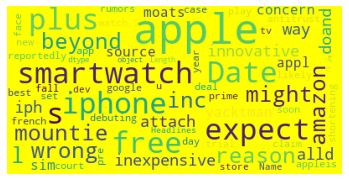

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['font.size']=20
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="yellow",stopwords=stopwords,max_words=200,max_font_size=50, 
                          random_state=42).generate(str(final_df['Headlines']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()